# Optimizing Marketing Spend for Showz: Customer Behavior & ROI Analysis



**Project Overview**  
In this notebook, we will explore how to maximize return on marketing investment for Showz, a **ticket‑sales platform**. Our investigation includes:

- **Data Sources**  
  - Server logs (Jan 2017 – Dec 2018) capturing user visits  
  - Order records for the same period  
  - Marketing spend statistics  

- **Key Objectives**  
  1. **User Behavior Analysis**  
     - Track how and when customers interact with the platform  
  2. **Purchase Timing**  
     - Measure the interval between first visit and first purchase  
  3. **Customer Revenue Contribution**  
     - Calculate total revenue per customer over their lifetime  
  4. **Acquisition ROI**  
     - Determine the point at which a customer’s lifetime revenue covers their acquisition cost  

> **Outcome:** Identify high‑ROI customer segments and pinpoint when marketing campaigns achieve payback.

## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
visits = pd.read_csv('Datasets/visits_log_us.csv')
orders = pd.read_csv('Datasets/orders_log_us.csv')
costs = pd.read_csv('Datasets/costs_us.csv')

## Data Preprocessing and Cleaning

In [3]:
# Displaying the first few rows and info of the datasets
print(visits.info())
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [4]:
#converting date columns to datetime format
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [5]:
# verifying for null values and duplicates
print(visits.isnull().sum())
print(visits.duplicated().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
0


In [6]:
# Displaying the first few rows and info of the datasets
print(orders.info())
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [7]:
#converting date columns to datetime format
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [8]:
# verifying for null values and duplicates
print(orders.isnull().sum())
print(orders.duplicated().sum())

Buy Ts     0
Revenue    0
Uid        0
dtype: int64
0


In [9]:
# Displaying the first few rows and info of the datasets
print(costs.info())
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [10]:
#converting date columns to datetime format
costs['dt'] = pd.to_datetime(costs['dt'])

In [11]:
# verifing for null values and duplicates
print(costs.isnull().sum())
print(costs.duplicated().sum())

source_id    0
dt           0
costs        0
dtype: int64
0


## Data Analysis and Metrics

### Visits


How many people use it every day, week and month?

In [12]:
# unique users per day
visits['date'] = visits['Start Ts'].dt.date
daily_users = visits.groupby('date')['Uid'].nunique()
print("Number of unique users per day: ")
display(daily_users.head())

# Number of sessions per day
daily_sessions = visits.groupby('date')['Uid'].count()
print("Number of sessions per day: ")
display(daily_sessions.head())

Number of unique users per day: 


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Number of sessions per day: 


date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64

In [13]:
#number of unique users per week
visits['week'] = visits['Start Ts'].dt.to_period('W').dt.start_time.dt.date
weekly_users = visits.groupby('week')['Uid'].nunique()
print("Number of unique users per week: ")
display(weekly_users.head())

Number of unique users per week: 


week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: Uid, dtype: int64

In [14]:
#number of unique users per month
visits['month'] = visits['Start Ts'].dt.to_period('M').astype(str)
monthly_users = visits.groupby('month')['Uid'].nunique()
print()
display("Number of unique users per month:", monthly_users.head())


'Number of unique users per month:'

month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: Uid, dtype: int64

How many sessions are there per day?

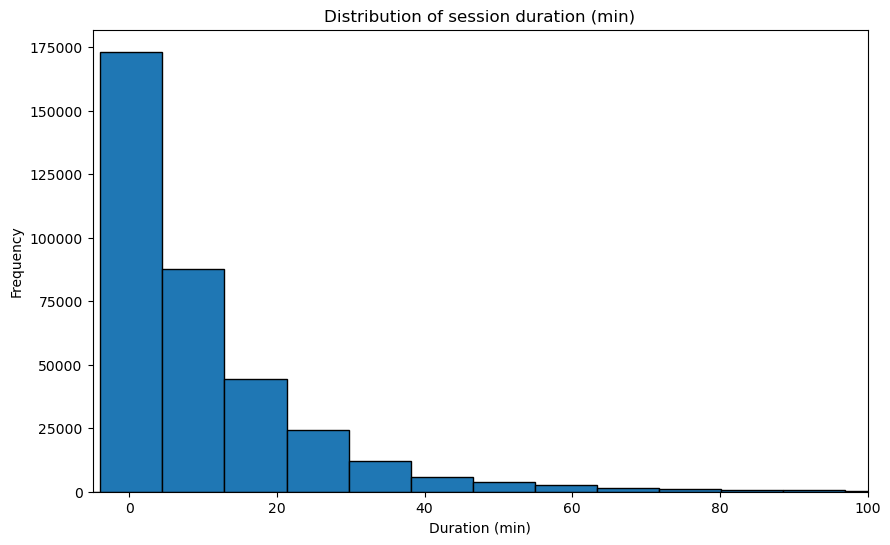

In [15]:
# calculating session duration
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60
visits['session_duration'].plot(kind='hist',
                               bins=90,
                               title='Distribution of session duration (min)',
                               figsize=(10,6),
                               edgecolor='black')
plt.xlim(-5, 100)
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

Most sessions last under 20 minutes, which is expected, as purchasing tickets typically takes less than 10 minutes — including selecting seats, entering personal details, and completing payment. This may indicate that the website is functioning efficiently. Sessions longer than 20 minutes could suggest usability issues or technical problems on the site. However, some sessions extend up to 100 minutes, which warrants further investigation. These outliers might reflect indecision from users, but it’s important to ensure they are not caused by poor site performance.

How often do users return?

In [16]:
# Calculating the time since last visit for each user
visits_sorted = visits.sort_values(by=['Uid', 'Start Ts'])
visits_sorted['prev_visit'] = visits_sorted.groupby('Uid')['Start Ts'].shift(1)
visits_sorted['days_since_last'] = (visits_sorted['Start Ts'] - visits_sorted['prev_visit']).dt.days
display(visits_sorted[['Uid', 'Start Ts', 'prev_visit', 'days_since_last']].head(10))

,Uid,Start Ts,prev_visit,days_since_last
196543,11863502262781,2018-03-01 17:27:00,NaT,NaN
257333,49537067089222,2018-02-06 15:55:00,NaT,NaN
173818,297729379853735,2017-06-07 18:47:00,NaT,NaN
173142,313578113262317,2017-09-18 22:49:00,NaT,NaN
192554,313578113262317,2018-02-18 15:17:00,2017-09-18 22:49:00,152.0
113873,313578113262317,2018-03-11 17:23:00,2018-02-18 15:17:00,21.0
34588,325320750514679,2017-09-30 14:29:00,NaT,NaN
41778,325320750514679,2018-02-26 12:33:00,2017-09-30 14:29:00,148.0
188450,397399764396656,2018-01-18 12:32:00,NaT,NaN
183750,407573351275847,2017-06-17 13:40:00,NaT,NaN


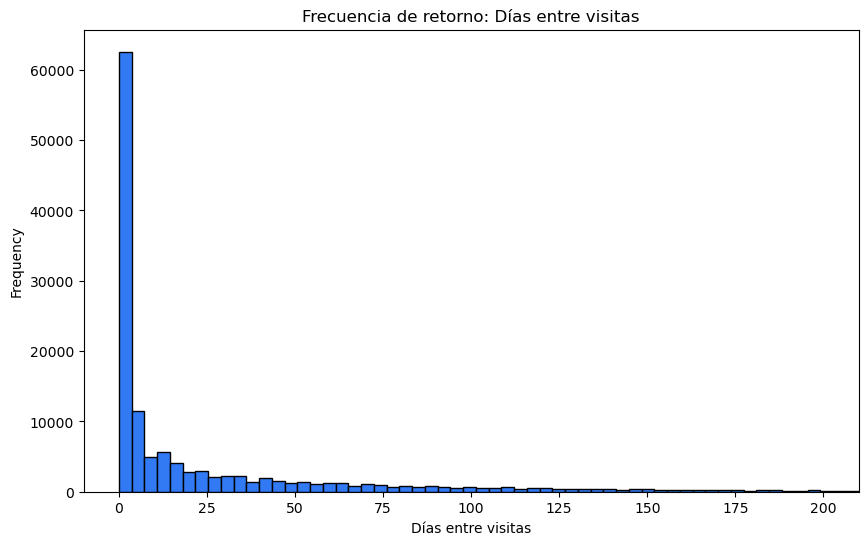

In [17]:
visits_sorted['days_since_last'].dropna().plot(kind='hist',
                               bins=100,
                               title='Frecuencia de retorno: Días entre visitas',
                               figsize=(10,6),
                               edgecolor='black',
                               color='#317af4')
plt.xlim(-10, 210)
plt.xlabel('Días entre visitas')
plt.show()

The peak in activity occurs within the first three days, indicating that users visit the site multiple times during this period. This behavior may be due to users coordinating with friends, comparing prices, or checking seat availability. Additionally, the data suggests a short product lifecycle: users typically make a purchase shortly after visiting and do not return until a future event of interest, which may occur months later. This explains why some users revisit the site even after more than 200 days.

### Sales

When do people start buying?

Time conversion for some users: 


,Uid,first_visit,first_order,conversion_days
11577,5807242877351636513,2017-09-13 20:42:00,2017-09-13 20:57:00,0
19933,10075911879844440863,2017-07-25 12:53:00,2017-09-03 22:02:00,40
27599,13950971602781323215,2018-02-12 23:50:00,2018-02-13 00:00:00,0
26530,13408352910403564964,2017-11-23 18:13:00,2018-03-17 22:30:00,114
22010,11121343464867158101,2017-11-16 19:39:00,2017-12-30 12:16:00,43
33754,17038061135351028524,2018-02-01 16:51:00,2018-02-13 13:49:00,11
19014,9619275213062918168,2017-09-22 15:25:00,2017-11-08 18:07:00,47
32517,16421632275071024567,2018-05-15 15:27:00,2018-05-15 15:47:00,0
28670,14466865575014439785,2017-06-05 08:40:00,2017-06-05 08:43:00,0
269,136882539483908538,2017-07-20 12:42:00,2017-07-20 12:46:00,0


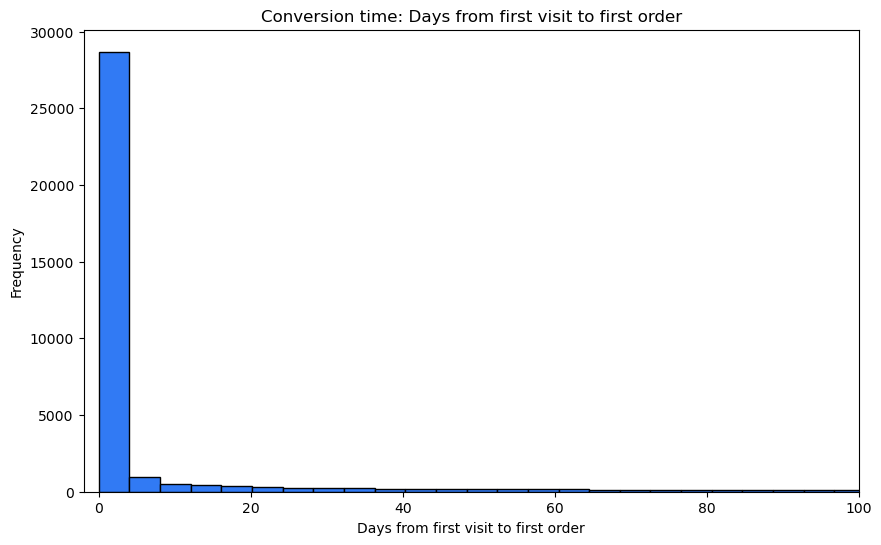

In [18]:
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit'})
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_order'})

#merging first visit and first order dataframes 
df_merge = pd.merge(first_visit, first_order, on='Uid', how='inner')
df_merge['conversion_days'] = (df_merge['first_order']-df_merge['first_visit']).dt.days

print('Time conversion for some users: ')
display(df_merge.sample(10))

df_merge['conversion_days'].plot(kind='hist',
                                bins=90,
                                title='Conversion time: Days from first visit to first order',
                                figsize=(10,6),
                                edgecolor='black',
                                color='#317af4')
plt.xlim(-2, 100)
plt.xlabel('Days from first visit to first order')
plt.show()

Orders per day

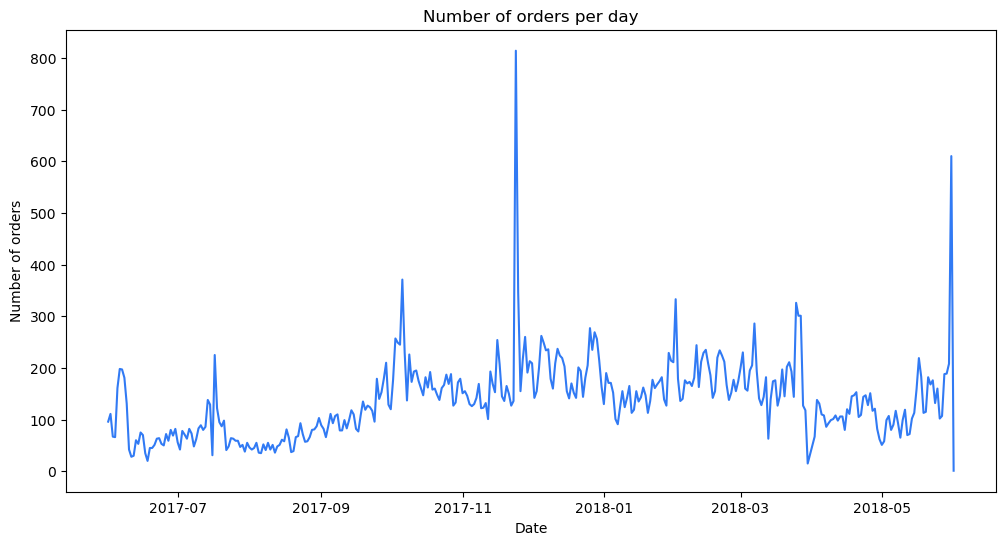

The day with the most orders was 2017-11-24 with 814 orders.


In [19]:
orders['order_date'] = orders['Buy Ts'].dt.date
orders_per_day = orders.groupby('order_date').size()


orders_per_day.plot(kind='line',
                    figsize=(12,6),
                    color='#317af4',
                    title='Number of orders per day',
                    xlabel='Date',
                    ylabel='Number of orders'
                   )
plt.show()

max_orders = orders_per_day.max()
max_day = orders_per_day.idxmax()  
print(f'The day with the most orders was {max_day} with {max_orders} orders.')


Orders per week

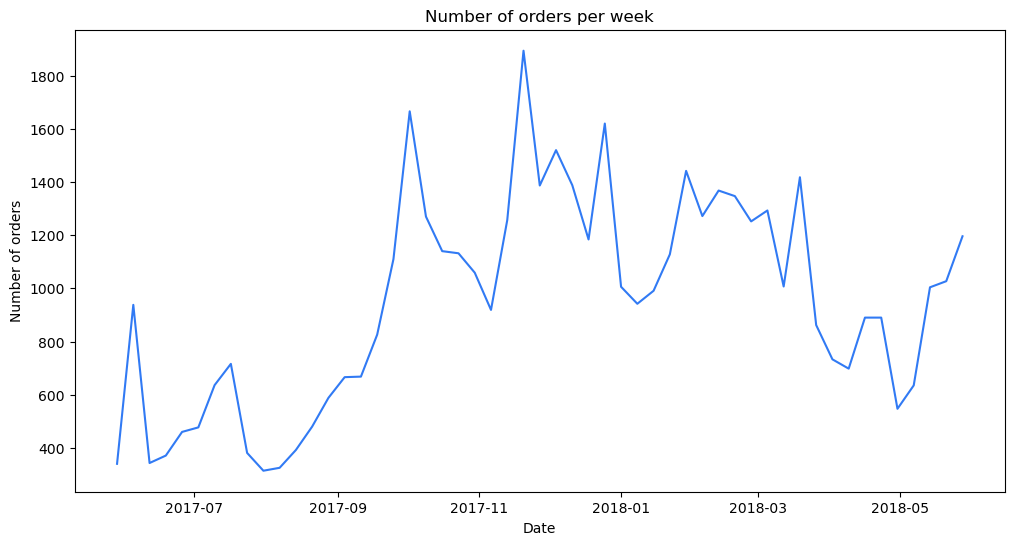

The week with the most orders started on 2017-11-20 with 1894 orders.


In [20]:
orders['order_week'] = orders['Buy Ts'].dt.to_period('W').dt.start_time.dt.date
orders_per_week = orders.groupby('order_week').size()

orders_per_week.plot(kind='line',
                    figsize=(12,6),
                    color='#317af4',
                    title='Number of orders per week',
                    xlabel='Date',
                    ylabel='Number of orders'
                   )
plt.show()
max_orders = orders_per_week.max()
max_day = orders_per_week.idxmax()  


print(f'The week with the most orders started on {max_day} with {max_orders} orders.')

Orders per month

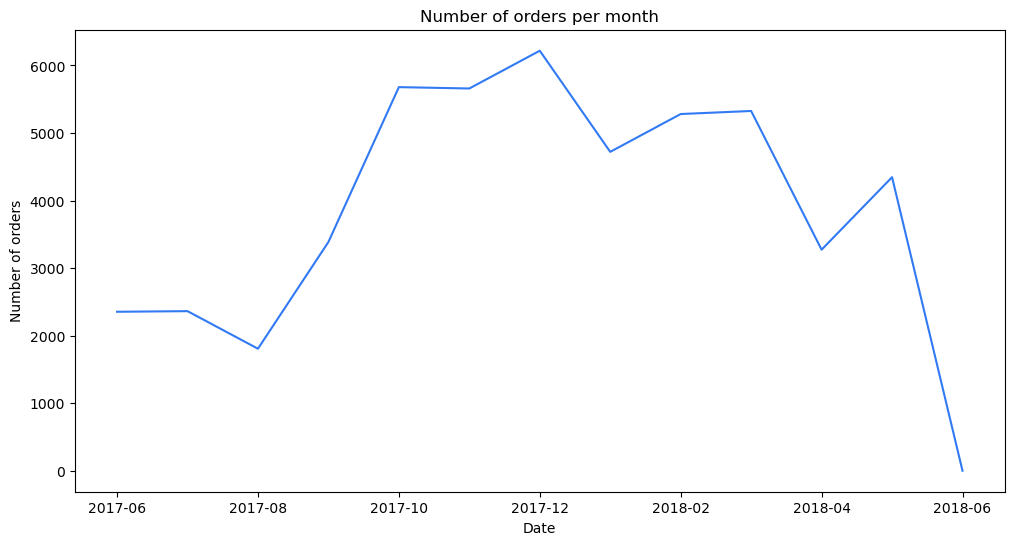

The month with the most orders was 2017-12 with 6218 orders.


In [21]:
orders['order_month'] = orders['Buy Ts'].dt.to_period('M').astype(str)
orders_per_month =  orders.groupby('order_month').size()

orders_per_month.plot(kind='line',
                    figsize=(12,6),
                    color='#317af4',
                    title='Number of orders per month',
                    xlabel='Date',
                    ylabel='Number of orders')
plt.show()
max_month = orders_per_month.idxmax()
max_month_orders = orders_per_month.max()

print(f"The month with the most orders was {max_month} with {max_month_orders} orders.")

The peak of sales was between October 2017 and December 2017, where the highest number of sales were recorded in these months, from then on they began to decline again.

What is the average purchase size?

In [22]:
#Calculate the average purchase size in revenue
orders_per_order = orders.groupby('Uid')['Revenue'].sum()
avg= orders_per_order.mean()
print(f"Average purchase size is: ${avg:.2f}")


#Calculate the average purchase size in number of items
avg_items_per_order = orders.groupby('Uid').size().mean()
print(f"Average purchase size (items): {avg_items_per_order:.2f}")

Average purchase size is: $6.90
Average purchase size (items): 1.38


### How much money do they bring? Life Time Value(LTV)

In [36]:
#Calculate LTV
ltv = orders.groupby("Uid")["Revenue"].sum().reset_index()
ltv.columns = ["Uid", "LTV"]
print('Some LTV per user: ')
display(ltv.head(10))

average_ltv = ltv["LTV"].mean()
print(f"Average LTV: ${average_ltv:.2f}")


Some LTV per user: 


,Uid,LTV
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
5,3077748354309989,4.67
6,3605148382144603,0.69
7,3753586865891862,3.50
8,4808417689019433,1.22
9,4992223027560440,3.05


Average LTV: $6.90


### Marketing


¿Cuánto dinero se gastó?

In [37]:
total_cost = costs['costs'].sum()
print(f"Total marketing costs: ${total_cost}")

Total marketing costs: $329131.62


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


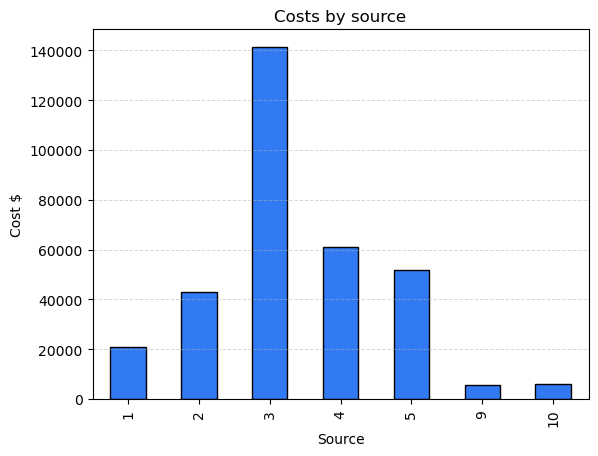

In [42]:
#cost by source
cost_source = costs.groupby('source_id')['costs'].sum()
print(cost_source)
cost_source.plot(kind='bar',
                title= 'Costs by source',
                xlabel='Source',
                ylabel='Cost $',
                edgecolor='black',
                color='#317af4'  
                )

plt.grid(
    axis="y",         
    linestyle="--",   
    linewidth=0.7,    
    alpha=0.5,       
)
plt.show()

What was the customer acquisition cost from each source?

In [ ]:
#We assume that the acquisition source of each user is that of their first registration
user_source = visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
#merge both dataframes
conversion_source = pd.merge( df_merge,user_source, on='Uid', how='left')
#clients per source
clients_source = conversion_source.groupby('Source Id')['Uid'].nunique()
print('Number of clients acquired by source: ')
display(clients_source)

Number of clients acquired by source: 


Source Id
1      2899
2      3506
3     10473
4     10296
5      6931
7         1
9      1088
10     1329
Name: Uid, dtype: int64

### Customer Acquisition Cost (CAC)

In [ ]:
#Calculate CAC (Customer Acquisition Cost)
cac = (cost_source/clients_source).dropna().round(2)
display(cac)

1      7.19
2     12.21
3     13.49
4      5.93
5      7.47
9      5.07
10     4.38
dtype: float64

### Return on Marketing Investment (ROMI)

In [46]:
orders_source = pd.merge(orders, user_source, on='Uid', how='left')
orders_source = orders_source[['Uid','Buy Ts', 'Revenue', 'Source Id']]
#calculate revenue by source
revenue_source = orders_source.groupby('Source Id')['Revenue'].sum()
revenue_source = revenue_source[revenue_source > 2] # delete the source 7 
display(revenue_source)

Source Id
1     31090.55
2     46923.61
3     54511.24
4     56696.83
5     52624.02
9      5759.40
10     4450.33
Name: Revenue, dtype: float64

In [47]:
#calculate ROMI (Return on Marketing Investment)
romi = (revenue_source - cost_source) / cost_source
print("The ROMI by acquisition source is:")
display(romi)

The ROMI by acquisition source is:


Source Id
1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
9     0.043844
10   -0.235665
dtype: float64

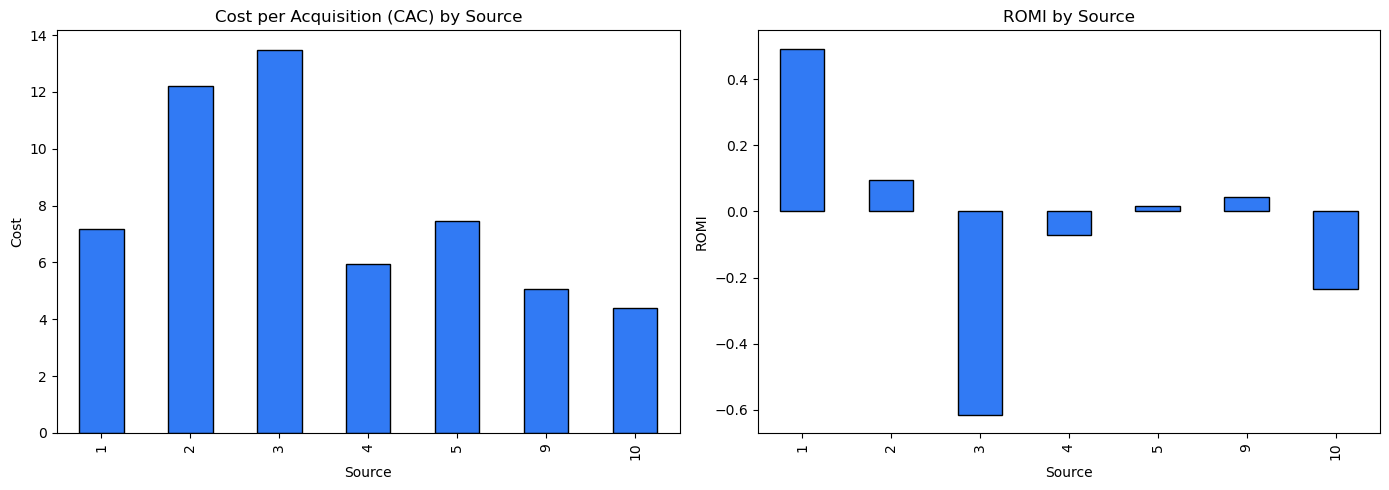

In [49]:

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black', color='#317af4')
ax[0].set_title('Cost per Acquisition (CAC) by Source')
ax[0].set_xlabel('Source')
ax[0].set_ylabel('Cost')

romi.plot(kind='bar', ax=ax[1], edgecolor='black', color="#317af4")
ax[1].set_title('ROMI by Source')
ax[1].set_xlabel('Source')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

### Conclusions

Source 1 is clearly the most profitable, with a relatively low acquisition cost and a ROMI close to 0.5 — meaning nearly half of every dollar invested is recovered. In contrast, Sources 2 and 3 have high customer acquisition costs; Source 2 barely breaks even, while Source 3 performs poorly with a negative ROMI of -0.6, indicating a loss of $0.60 for every dollar spent. This suggests that campaigns under Source 3 should be paused immediately. Source 4 has a moderate CAC and a less negative ROMI than Source 3, but it still results in financial loss. Source 5 shows a CAC of approximately $5 and a ROMI of -0.3, meaning $0.30 is lost per dollar invested — while not as severe as Source 3, it still indicates underperformance and should be re-evaluated or optimized.